In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print(os.listdir('../working'))

['__notebook__.ipynb']


In [4]:
import zipfile
zip_files = ['test','train']
for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print ("{} unzipped".format(zip_file))

test unzipped
train unzipped


In [5]:
print(os.listdir('../working'))

['train', 'test', '__notebook__.ipynb']


In [6]:
train_folder_path="../working/train"
test_folder_path="../working/test"
train_file_names = os.listdir(train_folder_path)
test_file_names = os.listdir(test_folder_path)
train_file_names[0:3]

['dog.8940.jpg', 'cat.10267.jpg', 'dog.2001.jpg']

In [7]:
test_data = os.listdir(test_folder_path)
test_data[0:3]

['3632.jpg', '9380.jpg', '4306.jpg']

In [8]:
test_label = []
a = os.listdir("../working/test")
for i in range(len(a)):
    test_label.append(a[i].split(".")[0])
test_label[0:5]

['3632', '9380', '4306', '3875', '9014']

In [9]:
targets = []
full_paths = []
for file_name in train_file_names:
    target = file_name.split(".")[0]
    full_path = os.path.join(train_folder_path,file_name)
    full_paths.append(full_path)
    targets.append(target)
train_df = pd.DataFrame()
train_df['image_path'] = full_paths
train_df['target'] = targets

In [10]:
train_df.head()

,image_path,target
0,../working/train/dog.8940.jpg,dog
1,../working/train/cat.10267.jpg,cat
2,../working/train/dog.2001.jpg,dog
3,../working/train/dog.7083.jpg,dog
4,../working/train/cat.3245.jpg,cat


In [11]:
full_paths = []
for file_name in test_file_names:
    target = file_name.split(".")[0]
    full_path = os.path.join(test_folder_path, file_name)
    full_paths.append(full_path)
test_df = pd.DataFrame()
test_df['image_path'] = full_paths

In [12]:
test_df.head()

,image_path
0,../working/test/3632.jpg
1,../working/test/9380.jpg
2,../working/test/4306.jpg
3,../working/test/3875.jpg
4,../working/test/9014.jpg


In [13]:
train_data, val_data = train_test_split(train_df, random_state=234)

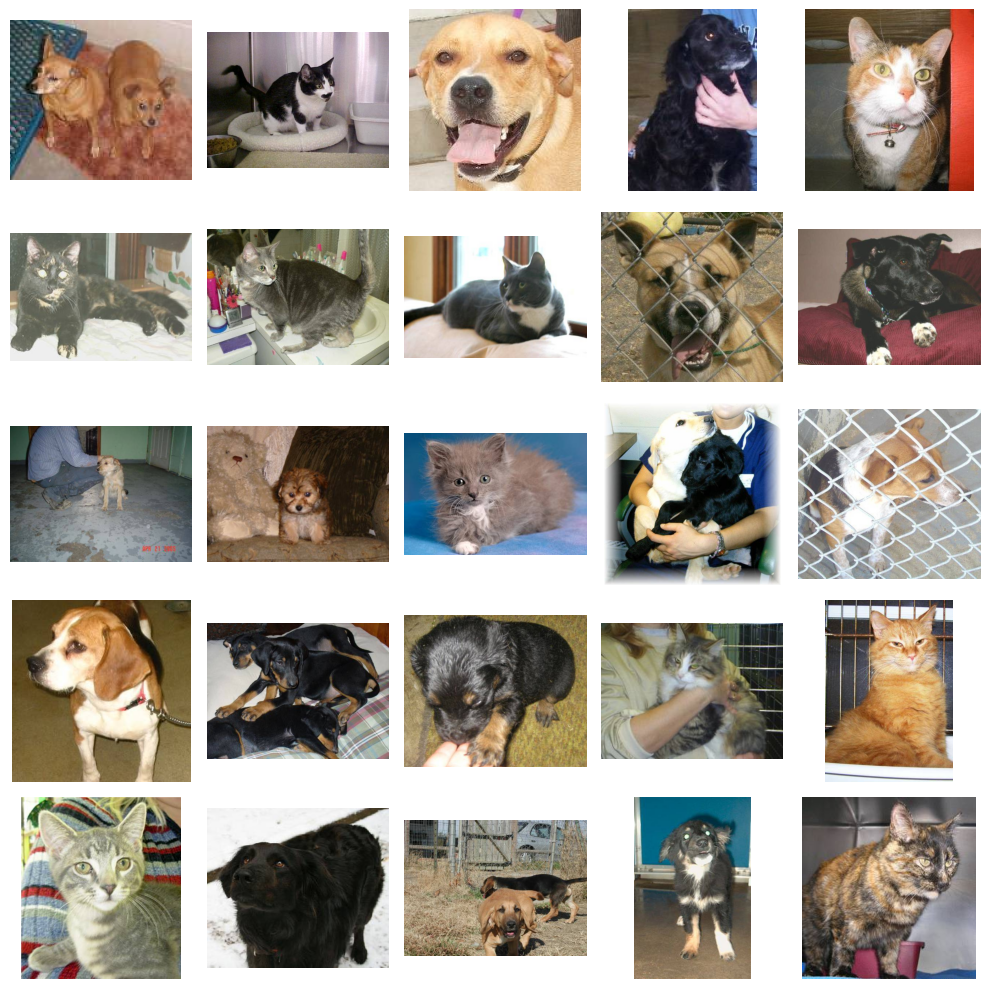

In [14]:
fig, axes = plt.subplots(5,5,figsize=(10,10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(img.imread(train_df.iloc[i,0]))
    axes[i].axis('off')
fig.tight_layout()
plt.show()

In [15]:
train_data.shape

(18750, 2)

In [16]:
val_data.shape

(6250, 2)

In [17]:
train_datagen = ImageDataGenerator(zoom_range=.18, rotation_range=10, rescale=1./255, shear_range=0.1,
                                  horizontal_flip=True,width_shift_range=0.1, height_shift_range=0.1)
train_data_generator = train_datagen.flow_from_dataframe(dataframe=train_data, x_col='image_path',y_col='target',
                                                        target_size=(150,150), class_mode='binary', batch_size=150, shuffle=False)

Found 18750 validated image filenames belonging to 2 classes.


In [18]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_data_generator = val_datagen.flow_from_dataframe(dataframe=val_data,x_col='image_path',y_col='target',
                                                  target_size=(150,150),class_mode='binary',batch_size=150,shuffle=False)

Found 6250 validated image filenames belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = test_datagen.flow_from_dataframe(dataframe=test_df,x_col='image_path',y_col=None,
                                                  target_size=(150,150),class_mode=None,batch_size=150,shuffle=False)

Found 12500 validated image filenames.


In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

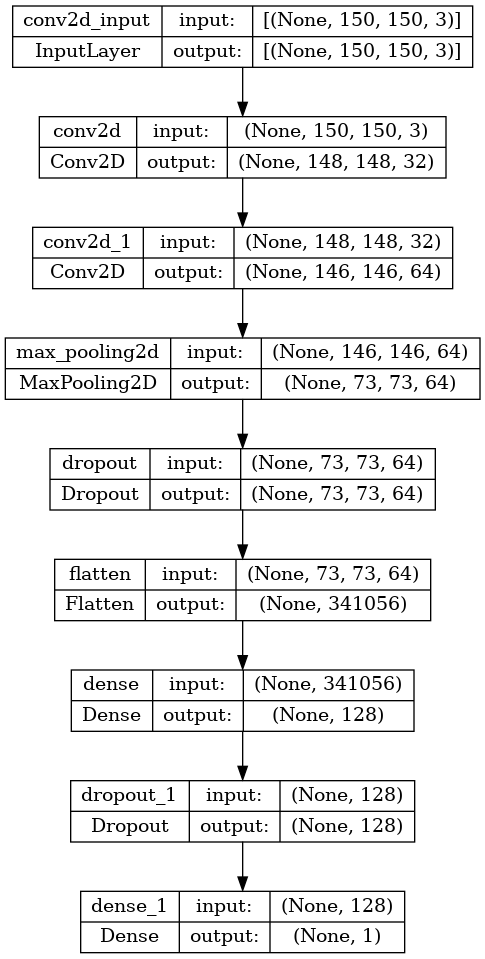

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [22]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               43655296  
                                                        

In [23]:
hist = model.fit(train_data_generator, epochs =10, validation_data= val_data_generator,
                validation_steps = val_data.shape[0]/150,
                steps_per_epoch=train_data.shape[0]/150,
                verbose=1)

Epoch 1/10
125/125 [==============================] - 1247s 10s/step - loss: 1.0358 - accuracy: 0.5739 - val_loss: 0.6540 - val_accuracy: 0.6301
Epoch 2/10
125/125 [==============================] - 1247s 10s/step - loss: 0.6450 - accuracy: 0.6396 - val_loss: 0.6357 - val_accuracy: 0.6450
Epoch 3/10
125/125 [==============================] - 1268s 10s/step - loss: 0.6318 - accuracy: 0.6533 - val_loss: 0.6144 - val_accuracy: 0.6678
Epoch 4/10
125/125 [==============================] - 1207s 10s/step - loss: 0.6257 - accuracy: 0.6598 - val_loss: 0.6143 - val_accuracy: 0.6747
Epoch 5/10
125/125 [==============================] - 1151s 9s/step - loss: 0.6141 - accuracy: 0.6678 - val_loss: 0.6151 - val_accuracy: 0.6626
Epoch 6/10
125/125 [==============================] - 1154s 9s/step - loss: 0.6032 - accuracy: 0.6797 - val_loss: 0.6002 - val_accuracy: 0.6704
Epoch 7/10
125/125 [==============================] - 1152s 9s/step - loss: 0.5918 - accuracy: 0.6911 - val_loss: 0.5850 - val_accur

In [24]:
score = model.evaluate(val_data_generator)
print(score[1])

42/42 [==============================] - 90s 2s/step - loss: 0.5117 - accuracy: 0.7429
0.7428799867630005


In [25]:
predictions = model.predict(test_data_generator)

84/84 [==============================] - 180s 2s/step


In [26]:
predictions = np.round(predictions.flatten()).astype(int)
predictions

array([1, 1, 0, ..., 0, 1, 1])

In [27]:
np.size(predictions)

12500

In [28]:
submission = pd.DataFrame({'id':test_label, 'label': predictions})
submission.to_csv("submission.csv", index=False)